In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np

In [2]:
# 預先訓練好的模型 -- VGG16, 不含後三層(辨識層)
base_model = VGG16(weights='imagenet', include_top=False)

# 連接自訂層
x = base_model.output
#x = layers.Flatten()(x)
x = layers.GlobalAveragePooling2D()(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(2, activation='sigmoid')(x)

# 設定新模型的 inputs/outputs
model = Model(inputs=base_model.input, outputs=x)

# VGG16 原有的層均不重新訓練
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='binary_crossentropy')  

In [3]:
from os import listdir
from os.path import isfile, join

# 取得 SMILEsmileD-master/SMILEs/positives/positives7 目錄下所有 .jpg 檔案名稱
img_path = './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives'
image_files_1 = np.array([join(img_path, f) for f in listdir(img_path) if isfile(join(img_path, f)) and f[-3:] == 'jpg'])
image_files_1

array(['./SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\100.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\1000.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\1005.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\1009.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\1011.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\1013.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\1014.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\103.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\106.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\116.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\123.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives\\13.jpg',
       './SMILEsmileD-m

In [4]:
# 取得 SMILEsmileD-master/SMILEs/negatives/negatives7 目錄下所有 .jpg 檔案名稱
img_path = './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives'
image_files_2 = np.array([join(img_path, f) for f in listdir(img_path) if isfile(join(img_path, f)) and f[-3:] == 'jpg'])
image_files_2

array(['./SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives\\10.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives\\1001.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives\\1002.jpg',
       ...,
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives\\994.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives\\998.jpg',
       './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives\\999.jpg'],
      dtype='<U70')

In [5]:
X = np.array([])
# 讀取 ./SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives 目錄下所有圖檔
for f in image_files_1:
    # 載入圖檔，並縮放寬高為 (224, 224) 
    img = image.load_img(f, target_size=(224, 224))
    # 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
    img2 = image.img_to_array(img)
    img2 = np.expand_dims(img2, axis=0)
    if len(X.shape) == 1:
        X = img2
    else:
        X = np.concatenate((X, img2), axis=0)

X = preprocess_input(X)

In [6]:
# 讀取 ./SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives 目錄下所有圖檔
for f in image_files_2:
    # 載入圖檔，並縮放寬高為 (224, 224) 
    img = image.load_img(f, target_size=(224, 224))
    # 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
    img2 = image.img_to_array(img)
    img2 = np.expand_dims(img2, axis=0)
    if len(X.shape) == 1:
        X = img2
    else:
        X = np.concatenate((X, img2), axis=0)

X = preprocess_input(X)

In [7]:
from tensorflow.keras.utils import to_categorical

y = np.concatenate((np.zeros(image_files_2.shape[0]), np.ones(image_files_1.shape[0])))
# one-hot encoding
y = to_categorical(y, num_classes=2)

In [8]:
model.fit(X, y, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
42/42 - 486s - loss: 0.1354 - val_loss: 4.0344 - 486s/epoch - 12s/step
Epoch 2/5
42/42 - 463s - loss: 0.1053 - val_loss: 3.7430 - 463s/epoch - 11s/step
Epoch 3/5
42/42 - 450s - loss: 0.1046 - val_loss: 2.9664 - 450s/epoch - 11s/step
Epoch 4/5
42/42 - 450s - loss: 0.1048 - val_loss: 3.8026 - 450s/epoch - 11s/step
Epoch 5/5
42/42 - 451s - loss: 0.0860 - val_loss: 6.5541 - 451s/epoch - 11s/step


1/1 [==============================] - 2s 2s/step
笑臉機率：0.02


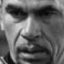

In [9]:
# 任意一張圖片測試
img_path = './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives/4.jpg'

# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))
# 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(f'笑臉機率：{round(model.predict(x)[0][1] * 100, 2):.2f}')

from IPython.display import Image
Image(img_path, width=200)

1/1 [==============================] - 0s 237ms/step
笑臉機率：0.00


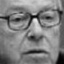

In [10]:
# 任意一張圖片測試
img_path = './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/negatives/1032.jpg'

# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))
# 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(f'笑臉機率：{round(model.predict(x)[0][1] * 100, 2):.2f}')

from IPython.display import Image
Image(img_path, width=200)

1/1 [==============================] - 0s 391ms/step
笑臉機率：0.24


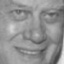

In [12]:
# 任意一張圖片測試
img_path = './SMILEsmileD-master/SMILEsmileD-master/Smiles-less/positives/3.jpg'

# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))
# 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(f'笑臉機率：{round(model.predict(x)[0][1] * 100, 2):.2f}')

from IPython.display import Image
Image(img_path, width=200)